## Importing the libraries

In [361]:
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [362]:
INPUT_FILE = 'summary_input.csv'
OUTPUT_FILE = 'summary_result.csv'
TRANSACTION_COLUMN = 'Transaction'
CATEGORY_COLUMN = 'Category'
LABEL_COLUMN = 'Label'

### Import Dataset

In [363]:
# Just make sure the columns 'Transaction' and 'Category' exist. Otherwise you need to change the code
dataset = pd.read_csv(INPUT_FILE)

print(dataset.head())

                 Transaction        Category
0  PETROCAN-2100 BURNHAMTHOR  TRANSPORTATION
1     TOMO SUSHI MISSISSAUGA            FOOD
2     TOMO SUSHI MISSISSAUGA            FOOD
3       MANULIFE         MSP  Life Insurance
4       ENERSOURCE   L6Y9Q2          Utility


# Preprocessing

### Data cleaning

In [364]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Transaction  174 non-null    object
 1   Category     173 non-null    object
dtypes: object(2)
memory usage: 2.8+ KB


In [365]:
# find out is there is any null values
dataset.isna().sum()

Transaction    0
Category       1
dtype: int64

In [366]:
# if there is any null values, the call below will elminate those rows
dataset = dataset.dropna()

In [367]:
# check after cleaning for null values
dataset.isna().sum()

Transaction    0
Category       0
dtype: int64

In [368]:
# Shuffle the rows randomly
dataset = dataset.sample(frac=1, random_state=42)  # Setting random_state for reproducibility

# Reset the index of the shuffled DataFrame
dataset = dataset.reset_index(drop=True)

In [369]:
# Some transactions which only 1 unique count may not be enough for the model to learn
# add more rows (a least 2 more) for those unique values to the data ...
item_counts = dataset[TRANSACTION_COLUMN].value_counts()
print(item_counts.sort_values(ascending=True))

# Count unique values in column 'Transaction'
value_counts_trans = dataset[TRANSACTION_COLUMN].value_counts()

# Filter DataFrame based on the count of unique values in column 'Transaction'
filtered_df = dataset[dataset[TRANSACTION_COLUMN].isin(value_counts_trans.index[value_counts_trans < 2])]

# Or better yet use the confusion matrix to see which categories are doing worst

Transaction
TIM HORTONS #6010 TORONTO         1
ANNUAL FEE                        1
PETRO CANADA00453 MISSISSAUGA     1
GLEN ERIN ESSO MISSISSAUGA        1
PIZZA PIZZA # 266 MISSISSAUGA     1
PETROCAN-1405 SOUTHDOWN R         1
TIM HORTONS #5795 TORONTO         1
PETROCAN-3990 EGLINTON AV         1
EXXON SUN FARMINGTON              1
SUNOCO 0442552600 CANANDAIGUA     1
PETRO CANADA05618 MISSISSAUGA     1
APPLE.COM/CA 800-676-2775         1
SHELL C20130 MISSISSAUGA          1
MOBIL@ - 4372 MISSISSAUGA         1
NEW WOK NEW WOK TORONTO           1
AMZN Mktp CA*AN5XM39E3            1
RETAIL INTEREST                   1
CASH INTEREST                     2
PETRO CANADA00475 MISSISSAUGA     2
TIM HORTONS #1431 OAKVILLE        2
PETROCAN-2100 BURNHAMTHOR         2
PETROCAN-4140ERINMILLS PK         3
BAR BURRITO MISSISSAUGA           3
COBS BREAD # 9321 MISSISSAUGA     3
MIFUEL #878 MISSISSAUGA           5
ENBRIDGE GAS H6Z9A7               6
CASH ADVANCE FEE                  7
SYSTEM76 Y7Q45 S

In [370]:
# remove space in column values
import re

dataset[TRANSACTION_COLUMN] = dataset[TRANSACTION_COLUMN].str.strip().replace('\s+', ' ', regex=True)
dataset[CATEGORY_COLUMN] = dataset[CATEGORY_COLUMN].str.strip().replace('\s+', ' ', regex=True)

print(dataset)


                     Transaction        Category
0                 SUBARU FINANCE      Rent/Lease
1                   MANULIFE MSP  Life Insurance
2          PFAFF BMW MISSISSAUGA  TRANSPORTATION
3         AMZN Mktp CA*AN5XM39E3       EDUCATION
4      BELL CANADA (OB) MONTREAL        INTERNET
..                           ...             ...
168     Subway 33041 Mississauga            FOOD
169            ENERSOURCE L6Y9Q2         Utility
170    TIM HORTONS #6010 TORONTO            FOOD
171        PFAFF BMW MISSISSAUGA  TRANSPORTATION
172  CODE WITH MOSH TEACHABLE.CO       EDUCATION

[173 rows x 2 columns]


In [371]:
categories = dataset[CATEGORY_COLUMN].unique()
print(categories)

['Rent/Lease' 'Life Insurance' 'TRANSPORTATION' 'EDUCATION' 'INTERNET'
 'CELL PHONE' 'FOOD' 'BANK FEE' 'OFFICE' 'Utility']


### Label encoding

In [372]:
# Label encoding and create a new column with the encoded data
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(dataset[CATEGORY_COLUMN])
# create new column with the encoded values
dataset[LABEL_COLUMN] = label_encoder.transform(dataset[CATEGORY_COLUMN])

In [373]:
dataset.tail()

,Transaction,Category,Label
168,Subway 33041 Mississauga,FOOD,3
169,ENERSOURCE L6Y9Q2,Utility,9
170,TIM HORTONS #6010 TORONTO,FOOD,3
171,PFAFF BMW MISSISSAUGA,TRANSPORTATION,8
172,CODE WITH MOSH TEACHABLE.CO,EDUCATION,2


### Creating the feature and dependent variables

In [374]:
X = dataset[TRANSACTION_COLUMN]
y = dataset[LABEL_COLUMN]

### Creating the Bag of Words model

In [375]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
vectorized_X = vectorizer.fit_transform(X)

### Split training and test sets

In [376]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectorized_X, y, test_size = 0.20, random_state = 0)

In [377]:
print(X_train)
print()
print(y_train)

  (0, 86)	0.5773502691896257
  (0, 65)	0.5773502691896257
  (0, 41)	0.5773502691896257
  (1, 3)	0.5858853943077198
  (1, 56)	0.5315053379840871
  (1, 87)	0.5315053379840871
  (1, 60)	0.3028901717219139
  (2, 84)	0.6464896895859964
  (2, 88)	0.6464896895859964
  (2, 60)	0.4050952511669375
  (3, 8)	0.6619657499339339
  (3, 81)	0.6619657499339339
  (3, 60)	0.35157174492386184
  (4, 57)	0.7071067811865475
  (4, 45)	0.7071067811865475
  (5, 75)	1.0
  (6, 50)	0.5765952147032889
  (6, 20)	0.59373707146099
  (6, 39)	0.5612613013153459
  (7, 25)	0.5302168273264238
  (7, 43)	0.5302168273264238
  (7, 9)	0.5302168273264238
  (7, 71)	0.39574025327189555
  (8, 79)	0.6253573976207258
  (8, 1)	0.6253573976207258
  :	:
  (130, 76)	0.6835197218864303
  (130, 60)	0.2561280530996049
  (131, 37)	0.7385673345329644
  (131, 70)	0.6147558124936712
  (131, 60)	0.27675545769888377
  (132, 86)	0.5773502691896257
  (132, 65)	0.5773502691896257
  (132, 41)	0.5773502691896257
  (133, 7)	0.4472135954999579
  (133, 1

### Training the model

In [378]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# XBoost is not good for image and text learning as shown below
# from xgboost import XGBClassifier
# classifier = XGBClassifier(objective="multi:softmax", num_class=3)
# classifier.fit(X_train, y_train)

RandomForestClassifier()

### Prediction and classification

In [379]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [1 0 0 1 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 3]]


0.9428571428571428

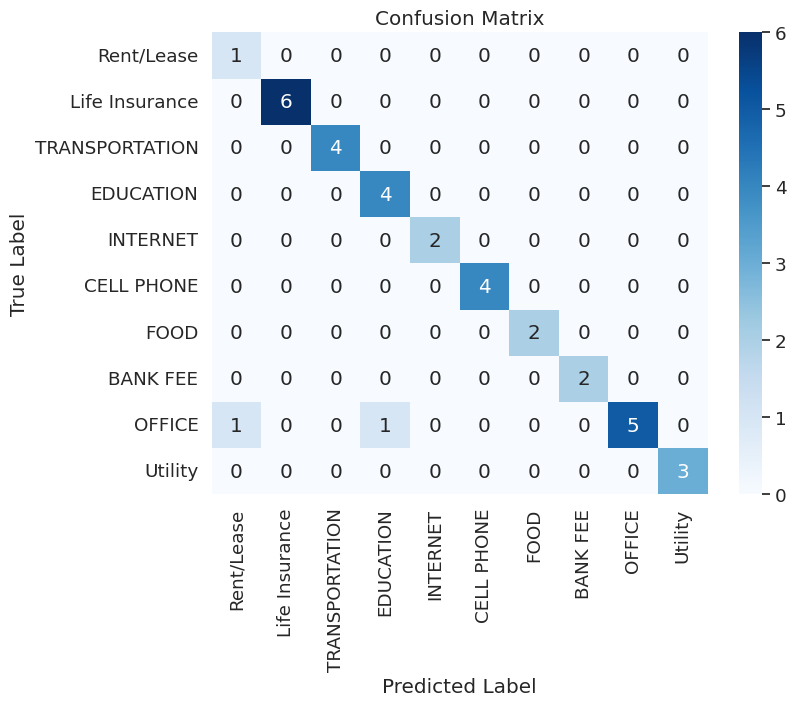

In [380]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
# Adjust font size as needed
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
# plt.show()
plt.savefig("confusion.png")

As above show the accuraccy is above 80% (for my data of course). No bad. In the future will use different models to see if there is an improvement in accuracy

### Applying the model

In [381]:
# I remove the Date, amount columns for privacy. Don't do that with real data
dataset_result = pd.read_csv(OUTPUT_FILE)

# removing 'Category' column if exist. It will be added later by the prediction ...
if CATEGORY_COLUMN in dataset_result.columns:
    dataset_result.drop(columns=[CATEGORY_COLUMN], inplace=True)

dataset_result = dataset_result.dropna()
print(dataset_result.tail())

             Transaction
89            ANNUAL FEE
90  MANULIFE         MSP
91  MANULIFE         MSP
92  ENBRIDGE GAS H6Z9A7 
93  ENBRIDGE GAS J7W3W7 


Notice above output showing that there is only one column 'Transaction' (Remove 'Category' column if exist).
We are going to add a new column 'Category' that the model is going set the value

In [382]:
# vectorize the data
features = vectorizer.transform(dataset_result[TRANSACTION_COLUMN])

# apply model to get predictions ...
predictions = classifier.predict(features)

# convert output labels to new 'Category' column
dataset_result[CATEGORY_COLUMN] = label_encoder.inverse_transform(predictions)

dataset_result.to_csv(OUTPUT_FILE, index=False)

### Final result ...

In [383]:
print(dataset_result.tail())

             Transaction        Category
89            ANNUAL FEE        BANK FEE
90  MANULIFE         MSP  Life Insurance
91  MANULIFE         MSP  Life Insurance
92  ENBRIDGE GAS H6Z9A7          Utility
93  ENBRIDGE GAS J7W3W7          Utility


### The resulting file summary_result.csv is bang on. No more manual creation of Category. Teach the computer to do it for you.

### Enjoy Machine Learning